# 1/19/21 - This notebook applies correlation tests (Spearman, Pearson, and Kendall) for autoz output and lens scores.
Spearman ranking - monotonic

Pearson ranking - linear

Kendall Tau - monotonic

In [1]:
# libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.stats as stats

%matplotlib inline

from astropy import constants as const
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM, z_at_value

c = const.c.to('km/s').value #c in km/s
h0 = 73.8 #h0 in km/(Mpc*s) Riess2011
cosmo = FlatLambdaCDM(h0, Om0=0.262)

# paths
csv_path = '/data/sknabel/autoz_lens_model/files/csv/'
latest_path= f'{csv_path}latest/'
png_path = '/data/sknabel/autoz_lens_model/visuals/png/'
knabel2020_file_path = '/data/sknabel/lens_methods/files/'

In [4]:
# import samples
links = pd.read_csv(f'{latest_path}links_sample_latest_len40.csv')
links_knabel = pd.read_csv(f'{latest_path}links_knabel_sample_latest_len6.csv')
li = pd.read_csv(f'{latest_path}li_sample_latest_len3.csv')

print(len(links), len(links_knabel), len(li))

40 6 3


In [5]:
links.columns

Index(['Unnamed: 0', 'GAMA_ID', 'ID', 'RA_x', 'DEC_x', 'type',
       'corrected_stellar_mass', 'zlens', 'sigma_lens', 'zsource',
       'sigma_source', 'R', 'dlens', 'dsource', 'Z', 'STELLAR_MASS', 'z1',
       'sigma1', 'template1', 'z2', 'sigma2', 'template2', 'sigma3', 'sigma4',
       'prob', 'error', 'score', 'P1', 'P3'],
      dtype='object')

In [61]:
# make new column that is best probability measurement
# for links
links["cnn_probability"] = np.zeros(len(links))

for i in range(len(links)):
    probabilities = np.nan_to_num([links.P1[i], links.P3[i]])#, samples.prob[i]])
    print((probabilities))
    links['cnn_probability'][i] = np.max(probabilities)

# for links_knabel
links_knabel["cnn_probability"] = np.zeros(len(links_knabel))

for i in range(len(links_knabel)):
    probabilities = np.nan_to_num([links_knabel.P1[i], links_knabel.P3[i]])#, samples.prob[i]])
    print((probabilities))
    links_knabel['cnn_probability'][i] = np.max(probabilities)
                                   
# for li
li["cnn_probability"] = li.prob            

# merge to one catalog for correlation tests
samples = pd.concat([links, li])
samples.reset_index(inplace=True)
samples.drop(columns={'index'}, inplace=True)
print(samples.columns, len(samples))

# make new column that is best probability measurement
#samples["cnn_probability"] = np.zeros(len(samples))

#for i in range(len(samples)):
#    probabilities = np.nan_to_num([samples.P1[i], samples.P3[i], samples.prob[i]])
#    print((probabilities))
#    samples['cnn_probability'][i] = np.max(probabilities)
    
samples["cnn_probability"]

[0.832 0.   ]
[0.901 0.   ]
[0.876 0.   ]
[0.895 0.   ]
[0.909 0.   ]
[0.837 0.   ]
[0.   0.98]
[0.89  0.981]
[0.994 0.99 ]
[0.    0.812]
[0.    0.912]
[0.988 0.   ]
[0.812 0.   ]
[0.    0.862]
[0.    0.895]
[0.    0.964]
[0.903 0.   ]
[0.999 1.   ]
[1. 1.]
[0.838 0.   ]


/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


[0.929 0.   ]
[0.929 0.   ]
[0.843 0.   ]
[0.855 0.96 ]
[0.997 0.   ]
[0.    0.986]
[0.975 0.826]
[0.82 0.  ]
[0.    0.883]
[0.906 0.807]
[0.997 0.959]
[0.968 0.975]
[0.887 0.99 ]
[0.98  0.931]
[0.866 0.   ]
[0.843 0.   ]
[0.975 0.986]
[0.892 0.   ]
[0.959 0.   ]
[0.824 0.961]
[0.837 0.   ]
[0.988 0.   ]


/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



[0.999 1.   ]
[1. 1.]
[0.929 0.   ]
[0.    0.883]
Index(['D1', 'D2', 'DEC', 'DEC_x', 'DISC', 'GAMA_ID', 'ID', 'KIDS_ID', 'P1',
       'P3', 'R', 'RA', 'RA_x', 'STELLAR_MASS', 'Unnamed: 0', 'Unnamed: 0.1',
       'Z', 'cnn_probability', 'corrected_stellar_mass', 'dlens', 'dsource',
       'error', 'f_dm', 'mag', 'mag_err', 'name', 'num_0', 'prob',
       'probability', 'rms', 's*p/10', 'score', 'sigma1', 'sigma2', 'sigma3',
       'sigma4', 'sigma_lens', 'sigma_source', 'template1', 'template2',
       'theta_e_Ang_slide', 'type', 'z1', 'z2', 'z_max', 'z_min', 'zlens',
       'zphot', 'zsource'],
      dtype='object') 43


0     0.832000
1     0.901000
2     0.876000
3     0.895000
4     0.909000
5     0.837000
6     0.980000
7     0.981000
8     0.994000
9     0.812000
10    0.912000
11    0.988000
12    0.812000
13    0.862000
14    0.895000
15    0.964000
16    0.903000
17    1.000000
18    1.000000
19    0.838000
20    0.929000
21    0.929000
22    0.843000
23    0.960000
24    0.997000
25    0.986000
26    0.975000
27    0.820000
28    0.883000
29    0.906000
30    0.997000
31    0.975000
32    0.990000
33    0.980000
34    0.866000
35    0.843000
36    0.986000
37    0.892000
38    0.959000
39    0.961000
40    1.000000
41    0.999391
42    0.996585
Name: cnn_probability, dtype: float64

In [29]:
print(stats.spearmanr(samples.score, samples.sigma2)[:])
print(stats.pearsonr(samples.score, samples.sigma2)[:])
print(stats.kendalltau(samples.score, samples.sigma2)[:])

(0.05347665693621452, 0.7334193945756085)
(0.11419341308245975, 0.46591532761127885)
KendalltauResult(correlation=0.040619816893928705, pvalue=0.7273504130719752)


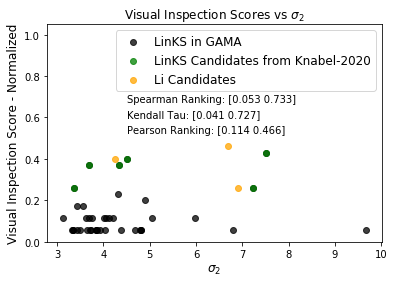

In [40]:
# visual inspection score to sigma2

spear = np.around(stats.spearmanr(samples.score, samples.sigma2)[:], 3)
pears = np.around(stats.pearsonr(samples.score, samples.sigma2)[:], 3)
kendall = np.around(stats.kendalltau(samples.score, samples.sigma2)[:], 3)

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(#links.R,
          links.sigma2,
    links.score/70.,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(#links_identified.R,
           links_knabel.sigma2,
    links_knabel.score/70.,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(#li.R,
           li.sigma2,
    li.score/10.,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')
plt.annotate(f'Spearman Ranking: {spear}', (4.5, 0.675))
plt.annotate(f'Kendall Tau: {kendall}', (4.5, 0.6))
plt.annotate(f'Pearson Ranking: {pears}', (4.5, 0.525))

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('Visual Inspection Score - Normalized', fontsize = 12)
ax.set_xlabel('$\sigma_2$',  fontsize = 12)
ax.set_title('Visual Inspection Scores vs $\sigma_2$')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig(f'{png_path}visual_score_to_sigma2_011821.png')

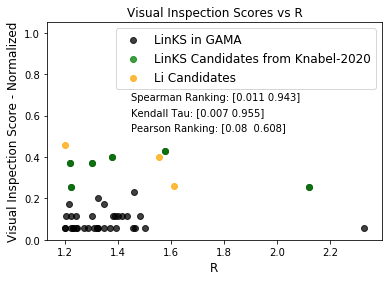

In [42]:
# visual inpsection score to R

spear = np.around(stats.spearmanr(samples.score, samples.R)[:], 3)
pears = np.around(stats.pearsonr(samples.score, samples.R)[:], 3)
kendall = np.around(stats.kendalltau(samples.score, samples.R)[:], 3)

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(links.R,
          #links.sigma2,
    links.score/70.,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(links_knabel.R,
           #links_knabel.sigma2,
    links_knabel.score/70.,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')
ax.scatter(li.R,
           #li.sigma2,
    li.score/10.,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')
plt.annotate(f'Spearman Ranking: {spear}', (1.45, 0.675))
plt.annotate(f'Kendall Tau: {kendall}', (1.45, 0.6))
plt.annotate(f'Pearson Ranking: {pears}', (1.45, 0.525))

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('Visual Inspection Score - Normalized', fontsize = 12)
ax.set_xlabel('R',  fontsize = 12)
ax.set_title('Visual Inspection Scores vs R')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig(f'{png_path}visual_score_to_R_011821.png')

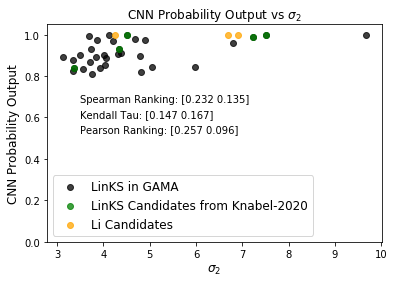

In [66]:
# CNN probability score vs sigma2


# statistical tests of correlation
spear = np.around(stats.spearmanr(samples.cnn_probability, samples.R)[:], 3)
pears = np.around(stats.pearsonr(samples.cnn_probability, samples.R)[:], 3)
kendall = np.around(stats.kendalltau(samples.cnn_probability, samples.R)[:], 3)

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(links.sigma2,
          #links.sigma2,
    links.P1,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(links_knabel.sigma2,
           #links_knabel.sigma2,
    links_knabel.P1,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')

ax.scatter(li.sigma2,
           #li.sigma2,
    li.probability,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')

plt.annotate(f'Spearman Ranking: {spear}', (3.5, 0.675))
plt.annotate(f'Kendall Tau: {kendall}', (3.5, 0.6))
plt.annotate(f'Pearson Ranking: {pears}', (3.5, 0.525))

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('CNN Probability Output', fontsize = 12)
ax.set_xlabel('$\sigma_2$',  fontsize = 12)
ax.set_title('CNN Probability Output vs $\sigma_2$')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig(f'{png_path}cnn_score_to_sigma2_011821.png')

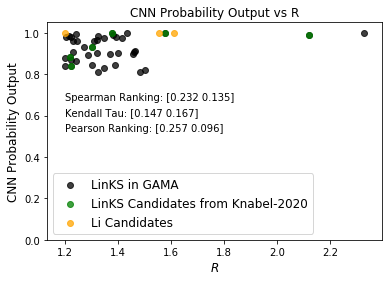

In [63]:
# CNN probability scores vs R

spear = np.around(stats.spearmanr(samples.cnn_probability, samples.R)[:], 3)
pears = np.around(stats.pearsonr(samples.cnn_probability, samples.R)[:], 3)
kendall = np.around(stats.kendalltau(samples.cnn_probability, samples.R)[:], 3)

fig = plt.figure()#figsize=(8,6))
ax = plt.subplot()
#ax.set_xlim(0., 2.5)
ax.set_ylim(0, 1.05)
ax.scatter(links.R,
          #links.sigma2,
    links.cnn_probability,
          color = 'k',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS in GAMA')
ax.scatter(links_knabel.R,
           #links_knabel.sigma2,
    links_knabel.cnn_probability,
          color = 'g',
          marker = 'o',
          alpha = 0.75,
          label = 'LinKS Candidates from Knabel-2020')

ax.scatter(li.R,
           #li.sigma2,
    li.cnn_probability,
          color = 'orange',
          marker = 'o',
          alpha = 0.75,
          label = 'Li Candidates')

plt.annotate(f'Spearman Ranking: {spear}', (1.2, 0.675))
plt.annotate(f'Kendall Tau: {kendall}', (1.2, 0.6))
plt.annotate(f'Pearson Ranking: {pears}', (1.2, 0.525))

#x.add_patch(patches.Rectangle((1.85, 4.5), 2, 10, 
 #                              edgecolor = 'k', facecolor = 'none', linestyle = ':',
  #                            label = 'Holwerda-15 Selection'))
#ax.axvline(1.2, color = 'k', linewidth = .75, linestyle = '--', label = 'R = 1.2')
ax.set_ylabel('CNN Probability Output', fontsize = 12)
ax.set_xlabel('$R$',  fontsize = 12)
ax.set_title('CNN Probability Output vs R')
plt.legend(fontsize=12)
#plt.show()

#plt.savefig(f'{png_path}cnn_score_to_R_011821.png')